In [25]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [26]:
colnames=['age', 'sex', 'chest pain type', 'resting blood pressure', 'serum cholestoral in mg/dl', 'fasting blood sugar > 120 mg/dl', 'resting electrocardiographic results', 'maximum heart rate achieved', 'exercise induced angina', 'ST depression induced by exercise relative to rest', 'the slope of the peak exercise ST segment', 'number of major vessels colored by flourosopy', 'thal', 'Absence/Presence']
heart = pd.read_csv('data/heart.dat', delimiter=' ', index_col=False, names=colnames)
heart.sample(10)

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,ST depression induced by exercise relative to rest,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,Absence/Presence
109,45.0,0.0,2.0,112.0,160.0,0.0,0.0,138.0,0.0,0.0,2.0,0.0,3.0,1
54,45.0,0.0,2.0,130.0,234.0,0.0,2.0,175.0,0.0,0.6,2.0,0.0,3.0,1
116,46.0,1.0,4.0,120.0,249.0,0.0,2.0,144.0,0.0,0.8,1.0,0.0,7.0,2
102,49.0,0.0,4.0,130.0,269.0,0.0,0.0,163.0,0.0,0.0,1.0,0.0,3.0,1
103,57.0,1.0,4.0,165.0,289.0,1.0,2.0,124.0,0.0,1.0,2.0,3.0,7.0,2
250,54.0,1.0,4.0,120.0,188.0,0.0,0.0,113.0,0.0,1.4,2.0,1.0,7.0,2
213,58.0,1.0,4.0,128.0,216.0,0.0,2.0,131.0,1.0,2.2,2.0,3.0,7.0,2
196,58.0,0.0,4.0,100.0,248.0,0.0,2.0,122.0,0.0,1.0,2.0,0.0,3.0,1
123,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,1
19,40.0,1.0,1.0,140.0,199.0,0.0,0.0,178.0,1.0,1.4,1.0,0.0,7.0,1


In [27]:
# Split the data into feature columns and target column
target_col = 'Absence/Presence'
y = heart.loc[:, target_col]
X = heart.drop(['Absence/Presence'], axis='columns')

In [34]:
# Do train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

# Train a logistic regression estimator
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Calculate test-set accuracy
lr.score(X_test, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8676470588235294

In [35]:
# Check class frequencies
y_test.value_counts(normalize=True)

1    0.632353
2    0.367647
Name: Absence/Presence, dtype: float64

In [36]:
# Get the confusion matrix for our admissions model
y_pred = lr.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 5, 20]])

In [37]:
#Measure the model's accuracy
accuracy = (39+20)/(39+4+5+20)
precision = (20/24)
recall = (20/25)

print(accuracy)
print(precision)
print(recall)

0.8676470588235294
0.8333333333333334
0.8


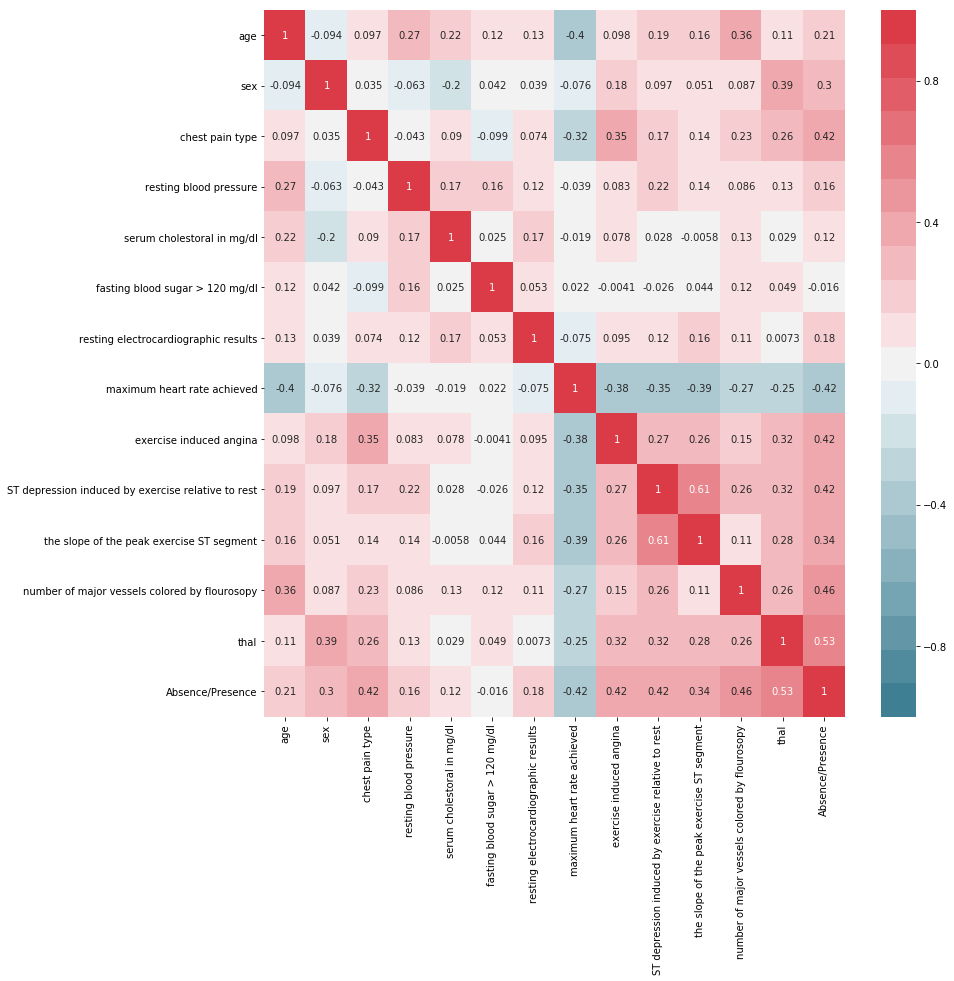

In [33]:
fig, ax = plt.subplots(figsize=(13,13))
sns.heatmap(heart.corr(),
            vmin = -1,
            vmax = 1,
            cmap = sns.diverging_palette(220,10, n=21),
            annot=True,
            ax = ax
            );